# MNIST Project - Classification Project

Import required libraries

In [1]:
import numpy as np

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [5]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
len(mnist['data'])

70000

# Visualisation

In [7]:
X, y = mnist['data'], mnist['target']

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [10]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
X.shape

(70000, 784)

In [12]:
y[69999]

9.0

In [13]:
y.shape

(70000,)

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

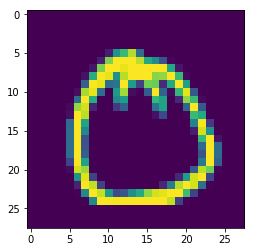

In [15]:
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image);

In [16]:
y[1000]

0.0

### Exercise: Locating the number and plot the image

In [17]:
type(y)

numpy.ndarray

In [18]:
y ==4

array([False, False, False, ..., False, False, False])

In [20]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [21]:
y[24754]

4.0

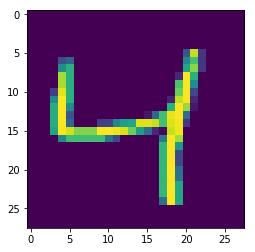

In [23]:
_ = X[24754]
_image = _.reshape(28, 28)
plt.imshow(_image);

###### Splitting the train and test sets

In [24]:
num_split = 6000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split]

## Shuffling the dataset

In [25]:
import numpy as np

In [28]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

In [36]:
y_train_0 = y_train ==0

In [37]:
y_train_0

array([ True,  True,  True, ...,  True,  True,  True])

In [38]:
y_test_0 = y_test ==0

In [39]:
y_test_0

False

At this point we can pick any classifier and train it.This is the iterative part of choosing and testing all the classifier and tuning the hyper parameters.

## SGDClassifier

## Training

In [41]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [43]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

## Prediction

In [44]:
clf.predict(X[1000].reshape(1, -1))

array([ True])

### StratifiedKFold

Lets' try with the StratifiedKFold stratified sampling to create multiple folds.

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [47]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [49]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

1.0000
0.9965
0.9995


cross_val_score using K_fold Cross-Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring = 'accuracy')

array([1.        , 0.9965    , 0.99949975])

In [52]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring = 'accuracy')

array([1.        , 1.        , 1.        , 1.        , 0.99666667,
       0.99833333, 1.        , 1.        , 0.9966611 , 1.        ])

In [53]:
1 - sum(y_train_0) / len(y_train_0)

0.012833333333333363

In [55]:
from sklearn.model_selection import cross_val_predict

In [56]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
confusion_matrix(y_train_0, y_train_pred)

array([[  74,    3],
       [   5, 5918]], dtype=int64)

In [59]:
from sklearn.metrics import precision_score, recall_score

In [61]:
precision_score(y_train_0, y_train_pred)

0.9994933288295896

In [62]:
recall_score(y_train_0, y_train_pred)

0.9991558331926389

In [63]:
from sklearn.metrics import f1_score

In [64]:
f1_score(y_train_0, y_train_pred)

0.999324552516042

In [65]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [66]:
y[1000]

0.0

In [67]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([917686.85561839])

In [68]:
threshold = 0

In [70]:
y_some_digits_pred = (y_scores > threshold)

In [71]:
y_some_digits_pred

array([ True])

In [72]:
threshold = 40000

In [73]:
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True])

In [75]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

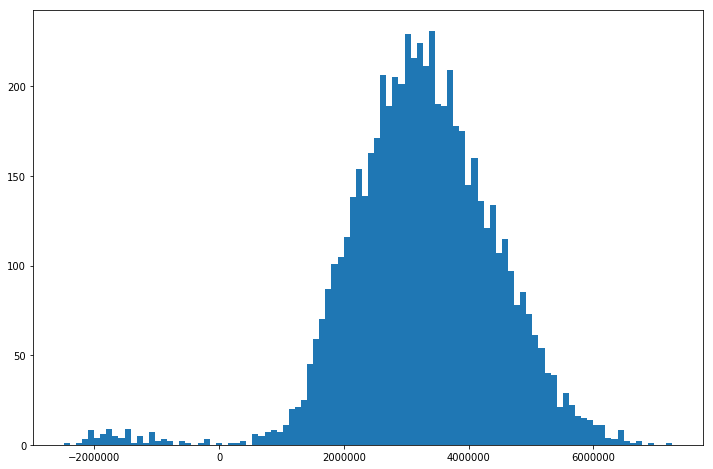

In [76]:
plt.figure(figsize=(12, 8)); plt.hist(y_scores, bins=100);

In [77]:
from sklearn.metrics import precision_recall_curve

In [78]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [79]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5]) 

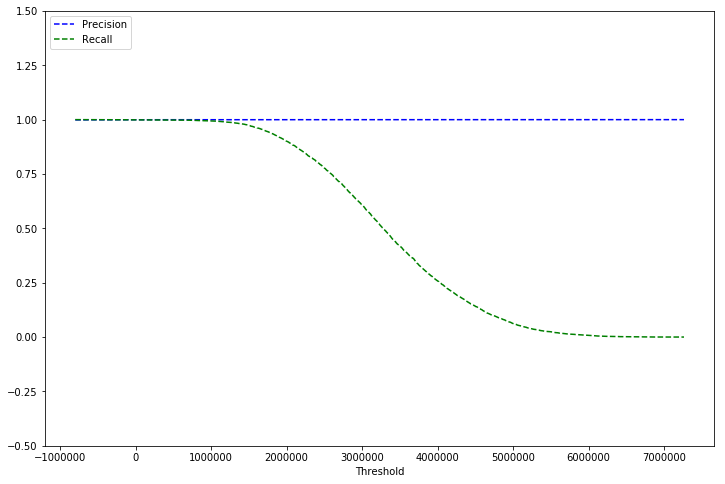

In [80]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

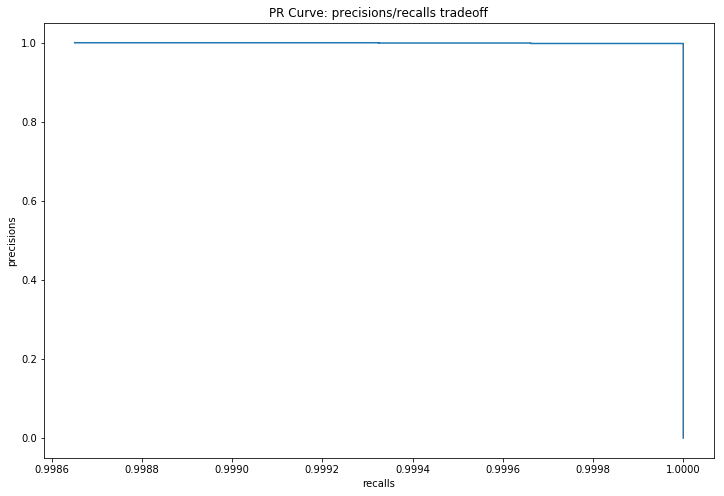

In [81]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

In [82]:
len(precisions)

5931

In [83]:
len(thresholds)

5930

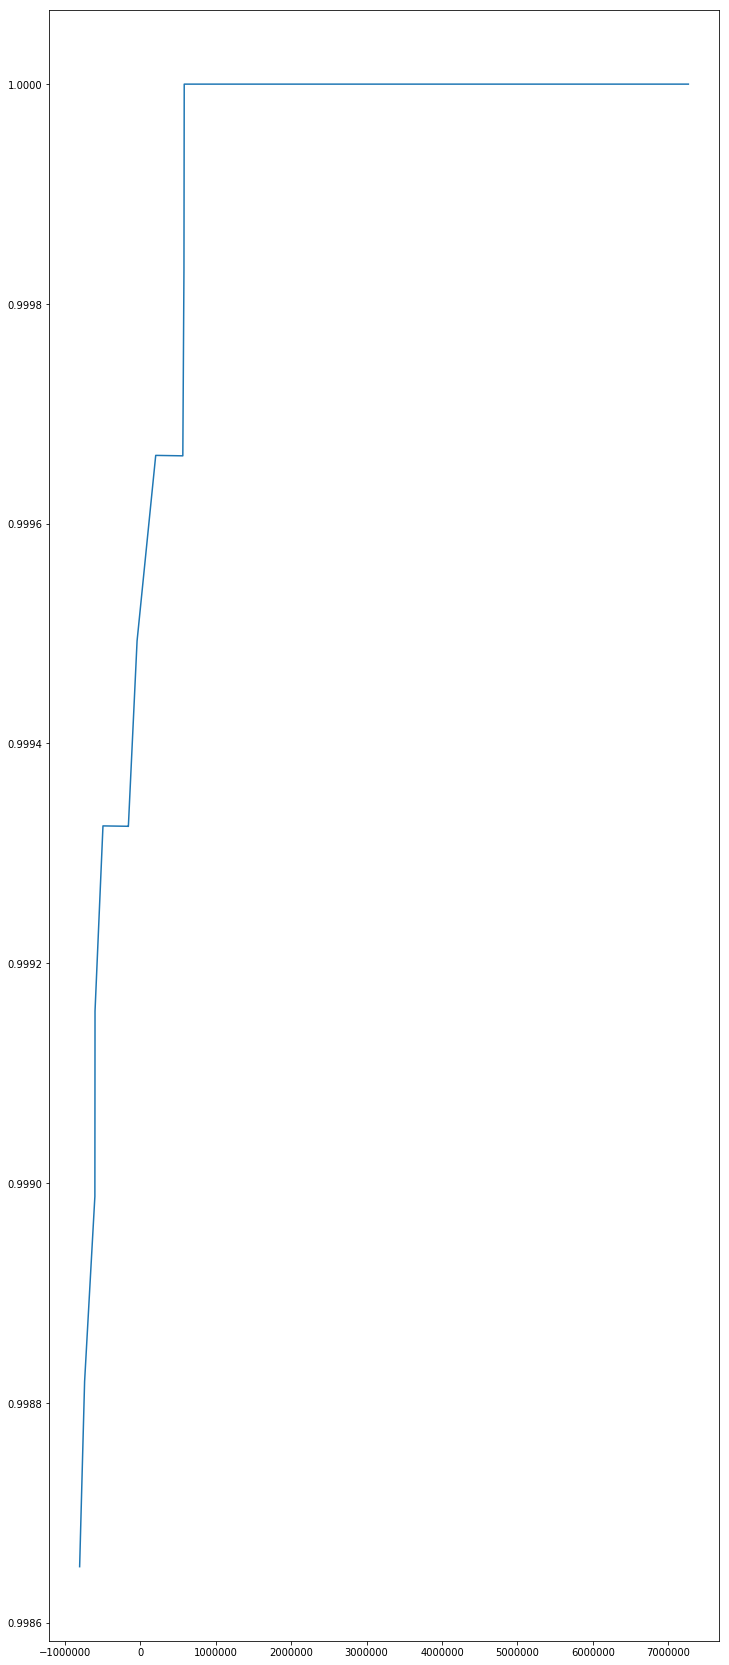

In [84]:
plt.figure(figsize=(12, 30));
plt.plot(thresholds, precisions[1:]);

In [86]:
idx = len(precisions[precisions <0.9])

In [87]:
thresholds[idx]

-801382.3188962026

In [88]:
y_train_pred_90 = (y_scores>21454)

In [89]:
precision_score(y_train_0, y_train_pred_90)

0.9994933288295896

In [90]:
recall_score(y_train_0,y_train_pred_90)

0.9991558331926389

In [91]:
idx = len(precisions[precisions <0.99])

In [92]:
idx = len(precisions) - len(precisions[precisions >0.99])

In [93]:
thresholds[idx]

-801382.3188962026

In [95]:
_train_pred_90 = (y_scores> thresholds[idx])

In [98]:
precision_score(y_train_0, y_train_pred_90)

0.9994933288295896

In [99]:
recall_score(y_train_0, y_train_pred_90)

0.9991558331926389

In [100]:
idx = len(recalls[recalls >0.9])

In [101]:
thresholds[idx]

2003208.9369077699

In [102]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [103]:
precision_score(y_train_0,y_train_pred_90)

1.0

In [104]:
recall_score(y_train_0, y_train_pred_90)

0.8997129832854972

In [105]:
from sklearn.metrics import roc_curve

In [106]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [107]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

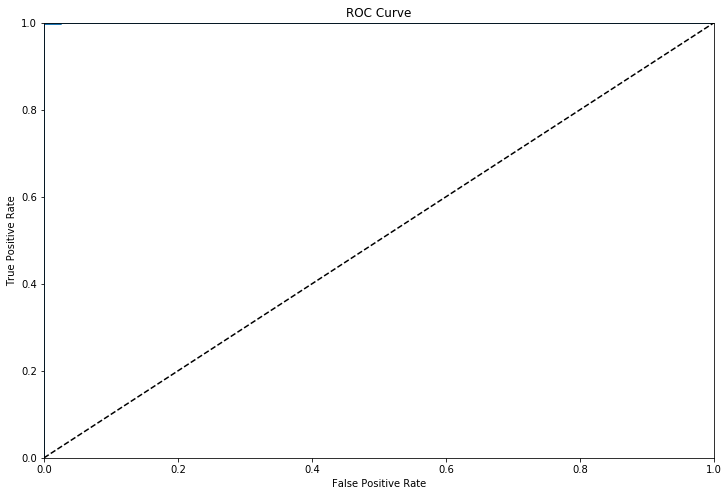

In [109]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [110]:
from sklearn.metrics import roc_auc_score

In [111]:
roc_auc_score(y_train_0, y_scores)

0.9999166796397929

In [113]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\waqar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [114]:
f_clf = RandomForestClassifier(random_state=0)

In [115]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0, cv=3, method='predict_proba')

In [117]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

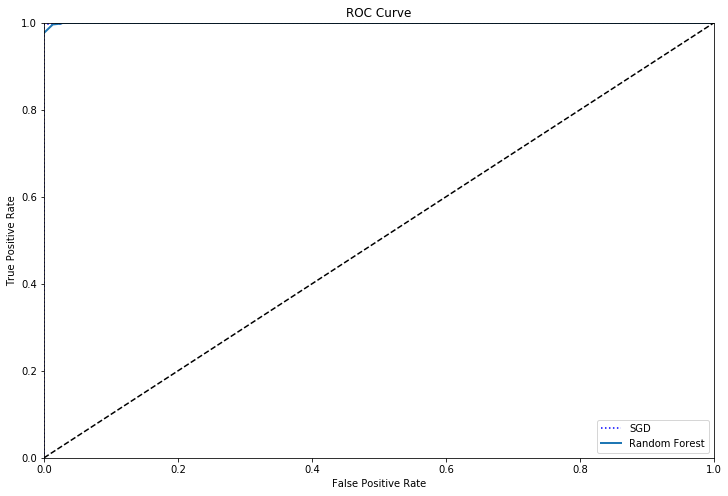

In [118]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [119]:
roc_auc_score(y_train_0, y_scores_forest)

0.9997938917405405

In [120]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [121]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [122]:
precision_score(y_train_0, y_train_rf) 

0.9993251223215792

In [123]:
recall_score(y_train_0, y_train_rf) 

1.0

In [124]:
confusion_matrix(y_train_0, y_train_rf)

array([[  73,    4],
       [   0, 5923]], dtype=int64)